### Import Modules and Python Functions

In [1]:
import os
import numpy as np
import pandas as pd
import yaml
with open('../python/variables.yaml') as info:
    VARS = yaml.load(info, Loader=yaml.FullLoader)

# visualization modules
import seaborn as sns; sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from random import randint
from pylab import rcParams

### Import Variables

In [2]:
# Events
events_csv = VARS['EVENTS_CSV']
events_cols_all = VARS['EVENTS_COLS_ALL']
events_cols_select = VARS['EVENTS_COLS_SELECT']

# Mentions
mentions_csv = VARS['MENTIONS_CSV']
mentions_cols_all = VARS['MENTIONS_COLS_ALL']
mentions_cols_select = VARS['MENTIONS_COLS_SELECT']

# Pilot
cameo_verbs = VARS['CAMEO_VERBS']
cameo_quadclass = VARS['CAMEO_QUADCLASS']
select_countries_60 = VARS['PILOT_COUNTRIES_IOS2']

### Define Reusable Python Functions

In [3]:
def get_var_percentages(df: pd, target_col: str, sort=False) -> pd:
    """Get Percentage of Column Values in Target Column of Cleaned GDELT Data
    :param df: dataframe of cleaned data
    :param target_col: column name of variable of interest
    :rtype: dataframe
    :return: dataframe
    """

    # Create a sub-dataframe to group GLOBALEVENTID by Target Column
    grouped_df = df[['GLOBALEVENTID', target_col]].groupby(target_col).count()
    
    # Get variable percentage                                                                
    grouped_df['%'] = (grouped_df['GLOBALEVENTID'] / grouped_df['GLOBALEVENTID'].sum()) * 100
    
    if sort==True:
        grouped_df = grouped_df.sort_values(by='%', ascending=False).reset_index()
    
    return grouped_df

In [4]:
def plot_piechart(df: pd, target_cols: str, pie_title: str, save_png: str) -> pd:
    """ Create colorful pie chart showing percent of events by variable label
    :param df: dataframe created via the get_var_percentages() function
    :param target_cols: target column in the get_var_percentages() function
    :param pie_title: target column string for pie chart title
    :param save_png: string based on the target column for storing png
    """
    # Create color list for pie chart visualization
    labels = df[target_cols]
    colors = []
    for i in range(len(labels)):
        colors.append('#%06X' % randint(0, 0xFFFFFF))
    
    if len(np.unique(labels)) > 8:
        rcParams['figure.figsize'] = 30,30
    else:
        rcParams['figure.figsize'] = 8,8

    # Plot
    plt.pie(df['%'], colors=colors, labels=labels, autopct='%1.1f%%')
    plt.title('Percentage of Events by '+ pie_title)
    plt.savefig('../images/conflict_' + save_png + '.png', dpi=300)
    plt.show()

### Import Data

In [5]:
# Store dataframe globally
%store -r cleaned_merged_df
print(cleaned_merged_df.shape)
cleaned_merged_df.head()

(1273, 19)


,GLOBALEVENTID,SQLDATE,EventCode,EventRootCode,QuadClass,GoldsteinScale,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_Lat,ActionGeo_Long,SOURCEURL,EventTimeDate,MentionTimeDate,Confidence,MentionDocTone,DaysBetween,EventRootCodeString,QuadClassString
0,972833876,20200304,51,5,1,3.4,3,"Baltimore, Maryland, United States",US,39.2904,-76.6122,https://patch.com/maryland/fallston/boyle-buic...,2021-03-04 18:45:00,2021-03-04 18:45:00,10.0,5.288462,0.0,ENGAGE IN DIPLOMATIC COOPERATION,Verbal Cooperation
1,972833877,20200304,51,5,1,3.4,2,"Maryland, United States",US,39.0724,-76.7902,https://patch.com/maryland/fallston/boyle-buic...,2021-03-04 18:45:00,2021-03-04 18:45:00,10.0,5.288462,0.0,ENGAGE IN DIPLOMATIC COOPERATION,Verbal Cooperation
2,972833878,20200304,10,1,1,0.0,3,"Long Island, California, United States",US,38.1669,-121.6250,http://www.nydailynews.com/snyde/ny-party-down...,2021-03-04 18:45:00,2021-03-04 18:45:00,30.0,5.084746,0.0,MAKE PUBLIC STATEMENT,Verbal Cooperation
3,972833879,20200304,50,5,1,3.5,1,Russia,RS,60.0000,100.0000,http://www.tribtown.com/2021/03/04/ap-eu-virus...,2021-03-04 18:45:00,2021-03-04 18:45:00,40.0,0.223714,0.0,ENGAGE IN DIPLOMATIC COOPERATION,Verbal Cooperation
4,972833880,20200304,120,12,3,-4.0,4,"Ahmedabad, Gujarat, India",IN,23.0333,72.6167,https://www.business-standard.com/article/opin...,2021-03-04 18:45:00,2021-03-04 18:45:00,50.0,0.641849,0.0,REJECT,Verbal Conflict


### Select Conflict Data (QuadClass=[3,4])

In [6]:
conflict_df = cleaned_merged_df.loc[ cleaned_merged_df['QuadClass'].isin([3,4]) ].reset_index(drop=True)
print(conflict_df.shape)
conflict_df.head()

(405, 19)


,GLOBALEVENTID,SQLDATE,EventCode,EventRootCode,QuadClass,GoldsteinScale,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_Lat,ActionGeo_Long,SOURCEURL,EventTimeDate,MentionTimeDate,Confidence,MentionDocTone,DaysBetween,EventRootCodeString,QuadClassString
0,972833880,20200304,120,12,3,-4.0,4,"Ahmedabad, Gujarat, India",IN,23.033300,72.616700,https://www.business-standard.com/article/opin...,2021-03-04 18:45:00,2021-03-04 18:45:00,50.0,0.641849,0.0,REJECT,Verbal Conflict
1,972833883,20200304,160,16,4,-4.0,1,Barbados,BB,13.166667,-59.533333,https://barbadostoday.bb/2021/03/04/uk-could-i...,2021-03-04 18:45:00,2021-03-04 18:45:00,100.0,-2.212389,0.0,REDUCE RELATIONS,Material Conflict
2,972833891,20200304,190,19,4,-10.0,3,"Los Angeles County, California, United States",US,34.366700,-118.201000,https://www.courthousenews.com/pelosi-denies-s...,2021-03-04 18:45:00,2021-03-04 18:45:00,30.0,0.000000,0.0,FIGHT,Material Conflict
3,972833892,20200304,190,19,4,-10.0,2,"Georgia, United States",US,32.986600,-83.648700,https://www.courthousenews.com/pelosi-denies-s...,2021-03-04 18:45:00,2021-03-04 18:45:00,20.0,0.000000,0.0,FIGHT,Material Conflict
4,972833895,20210202,111,11,3,-2.0,2,"New York, United States",US,42.149700,-74.938400,https://www.vladtv.com/article/270115/square-a...,2021-03-04 18:45:00,2021-03-04 18:45:00,50.0,3.225806,0.0,DISAPPROVE,Verbal Conflict


In [7]:
conflict_df.columns

Index(['GLOBALEVENTID', 'SQLDATE', 'EventCode', 'EventRootCode', 'QuadClass',
       'GoldsteinScale', 'ActionGeo_Type', 'ActionGeo_FullName',
       'ActionGeo_CountryCode', 'ActionGeo_Lat', 'ActionGeo_Long', 'SOURCEURL',
       'EventTimeDate', 'MentionTimeDate', 'Confidence', 'MentionDocTone',
       'DaysBetween', 'EventRootCodeString', 'QuadClassString'],
      dtype='object')

## Assess Metrics

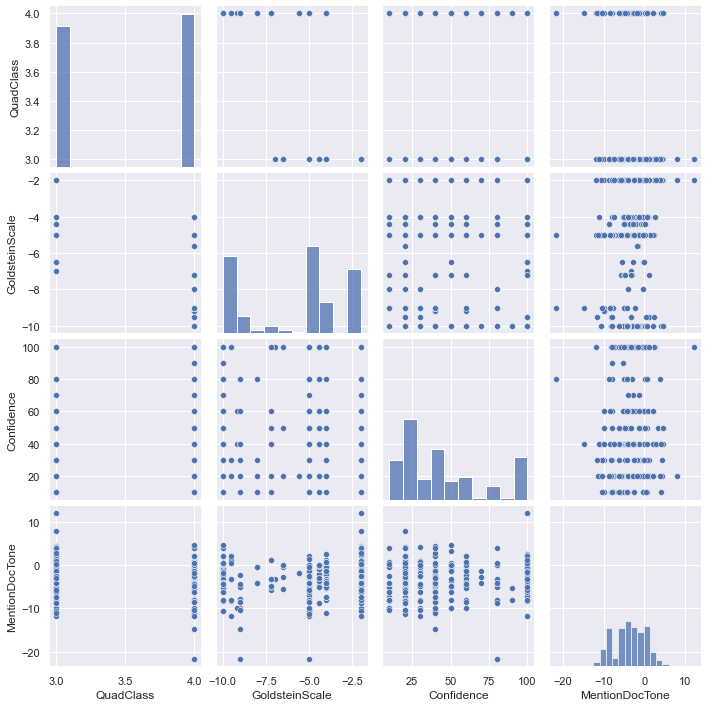

In [8]:
sns.pairplot(conflict_df[['QuadClass','GoldsteinScale','Confidence','MentionDocTone']])

Observations: Similar to what was noted in the previous, total, in a brief exploration of correlation of variable relationships, there doesn't appear to be any sort of visually detectable relationship between the general tone (MentionDocTone) of a source, the validity score (Confidence) of a source to the resulting behavioral (Quad) class and calculated Goldstein score of an event; there is a visually detectable relationship between between the behavioral (Quad) class and Goldstein score of an event, which is to be expected. This exploration is briefly placed on hold until after the meeting with the Data Engineers to establish the most efficient pipeline to import GDELT's data (02 March 2021)

### Question 1: What is the Percentage of Events per QuadClass? What is the MODE Confidence and Tone per QuadClass?

#### Percentage of Events by QuadClass

In [9]:
# Create a sub-dataframe to group GLOBALEVENTID by QuadClass
quadclass = get_var_percentages(conflict_df, 'QuadClassString', sort=True)
quadclass

,QuadClassString,GLOBALEVENTID,%
0,Material Conflict,211,52.098765
1,Verbal Conflict,194,47.901235


#### Visualize

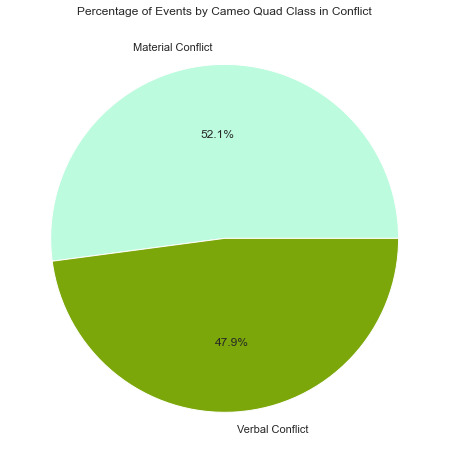

In [10]:
plot_piechart(quadclass, 'QuadClassString', 'Cameo Quad Class in Conflict', 'cameo_quadclass_percentages')

In [11]:
# Create a sub-dataframe to group GLOBALEVENTID by QuadClass without US 
non_us_df = conflict_df.loc[ conflict_df['ActionGeo_CountryCode'] != 'US' ]
non_us_quadclass = get_var_percentages(non_us_df, 'QuadClassString')
non_us_quadclass

,GLOBALEVENTID,%
QuadClassString,,
Material Conflict,130,51.792829
Verbal Conflict,121,48.207171


#### By Country

In [12]:
len(conflict_df['ActionGeo_CountryCode'].unique())

50

In [13]:
country_conflicts_df = conflict_df[['ActionGeo_CountryCode', 'QuadClassString', 'GLOBALEVENTID']].groupby(
    ['ActionGeo_CountryCode', 'QuadClassString'], as_index=False).count()
country_conflicts_df.columns = ['Country', 'QuadClass', 'Number Events']
country_conflicts_df.head()

,Country,QuadClass,Number Events
0,AE,Material Conflict,2
1,AU,Material Conflict,2
2,AU,Verbal Conflict,1
3,BB,Material Conflict,2
4,BK,Material Conflict,1


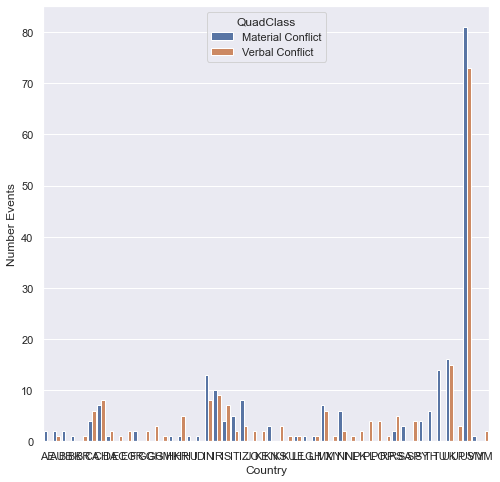

In [14]:
# plot
sns.barplot(x='Country', y='Number Events', hue='QuadClass', data=country_conflicts_df)
plt.show()

/Users/emily-work/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


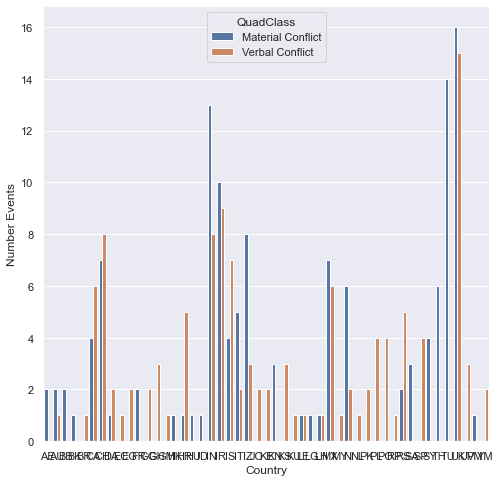

In [15]:
# plot
non_us_conflict_df = country_conflicts_df.loc[ country_conflicts_df['Country'] != 'US']
sns.barplot('Country', y='Number Events', hue='QuadClass', data=non_us_conflict_df)
plt.show()

Observations: While this needs to be assessed with more data, it appears that the US has substantially more records when compared to all other countries within this dataset. This exploration is briefly placed on hold until after the meeting with the Data Engineers to establish the most efficient pipeline to import GDELT's data (02 March 2021)

Observations: While this needs to be assessed with more data, it does appear that QuadClass 1, meaning Verbal Cooperation, is the most prevelant, followed by QuadClass 4, Material Cooperation. However, is based on the previous section, it would be worthwhile to remove US-associated events and re-assess. This exploration is briefly placed on hold until after the meeting with the Data Engineers to establish the most efficient pipeline to import GDELT's data (02 March 2021)

Observations: The propotions seemed to have remained roughly the same with a slight increase in QuadClass 1 and 4 and slight decreases in QuadClass 2 and 3. This exploration is briefly placed on hold until after the meeting with the Data Engineers to establish the most efficient pipeline to import GDELT's data (02 March 2021)

#### Specifically Explore Conflict in:
- Afghanistan (AF)
- Myanmar (MM)
- 

In [16]:
# create subdf
known_conflict_df = country_conflicts_df.loc[ country_conflicts_df['Country'].isin(['AF', 'MM'])]
print(known_conflict_df.shape)
known_conflict_df.head()

(0, 3)


,Country,QuadClass,Number Events


#### Mode of Confidence and MentionDocTone Values by QuadClass

In [17]:
# Create a sub-dataframe to group GLOBALEVENTID by QuadClass
quadclass_modes = conflict_df[['QuadClass','Confidence','MentionDocTone']
                                   ].groupby('QuadClass').agg(lambda x: pd.Series.mode(x)[0])
quadclass_modes

,Confidence,MentionDocTone
QuadClass,,
3,20.0,-4.179104
4,20.0,2.105263


Observations: The propotions seemed to have remained roughly the same with a slight increase in QuadClass 1 and 4 and slight decreases in QuadClass 2 and 3. This exploration is briefly placed on hold until after the meeting with the Data Engineers to establish the most efficient pipeline to import GDELT's data (02 March 2021)

### Question 2: What is the Percentage of Events per EventRootCode? What is the MODE Confidence and Tone per EventRootCode?

In [18]:
# Create a sub-dataframe to group GLOBALEVENTID by EventRootCode
cameoaction = get_var_percentages(conflict_df, 'EventRootCodeString', sort=True)
cameoaction

,EventRootCodeString,GLOBALEVENTID,%
0,FIGHT,103,25.432099
1,DISAPPROVE,89,21.975309
2,COERCE,59,14.567901
3,REJECT,54,13.333333
4,ASSAULT,24,5.925926
5,THREATEN,24,5.925926
6,DEMAND,22,5.432099
7,REDUCE RELATIONS,15,3.703704
8,EXHIBIT MILITARY POSTURE,9,2.222222
9,PROTEST,5,1.234568


#### Visualize

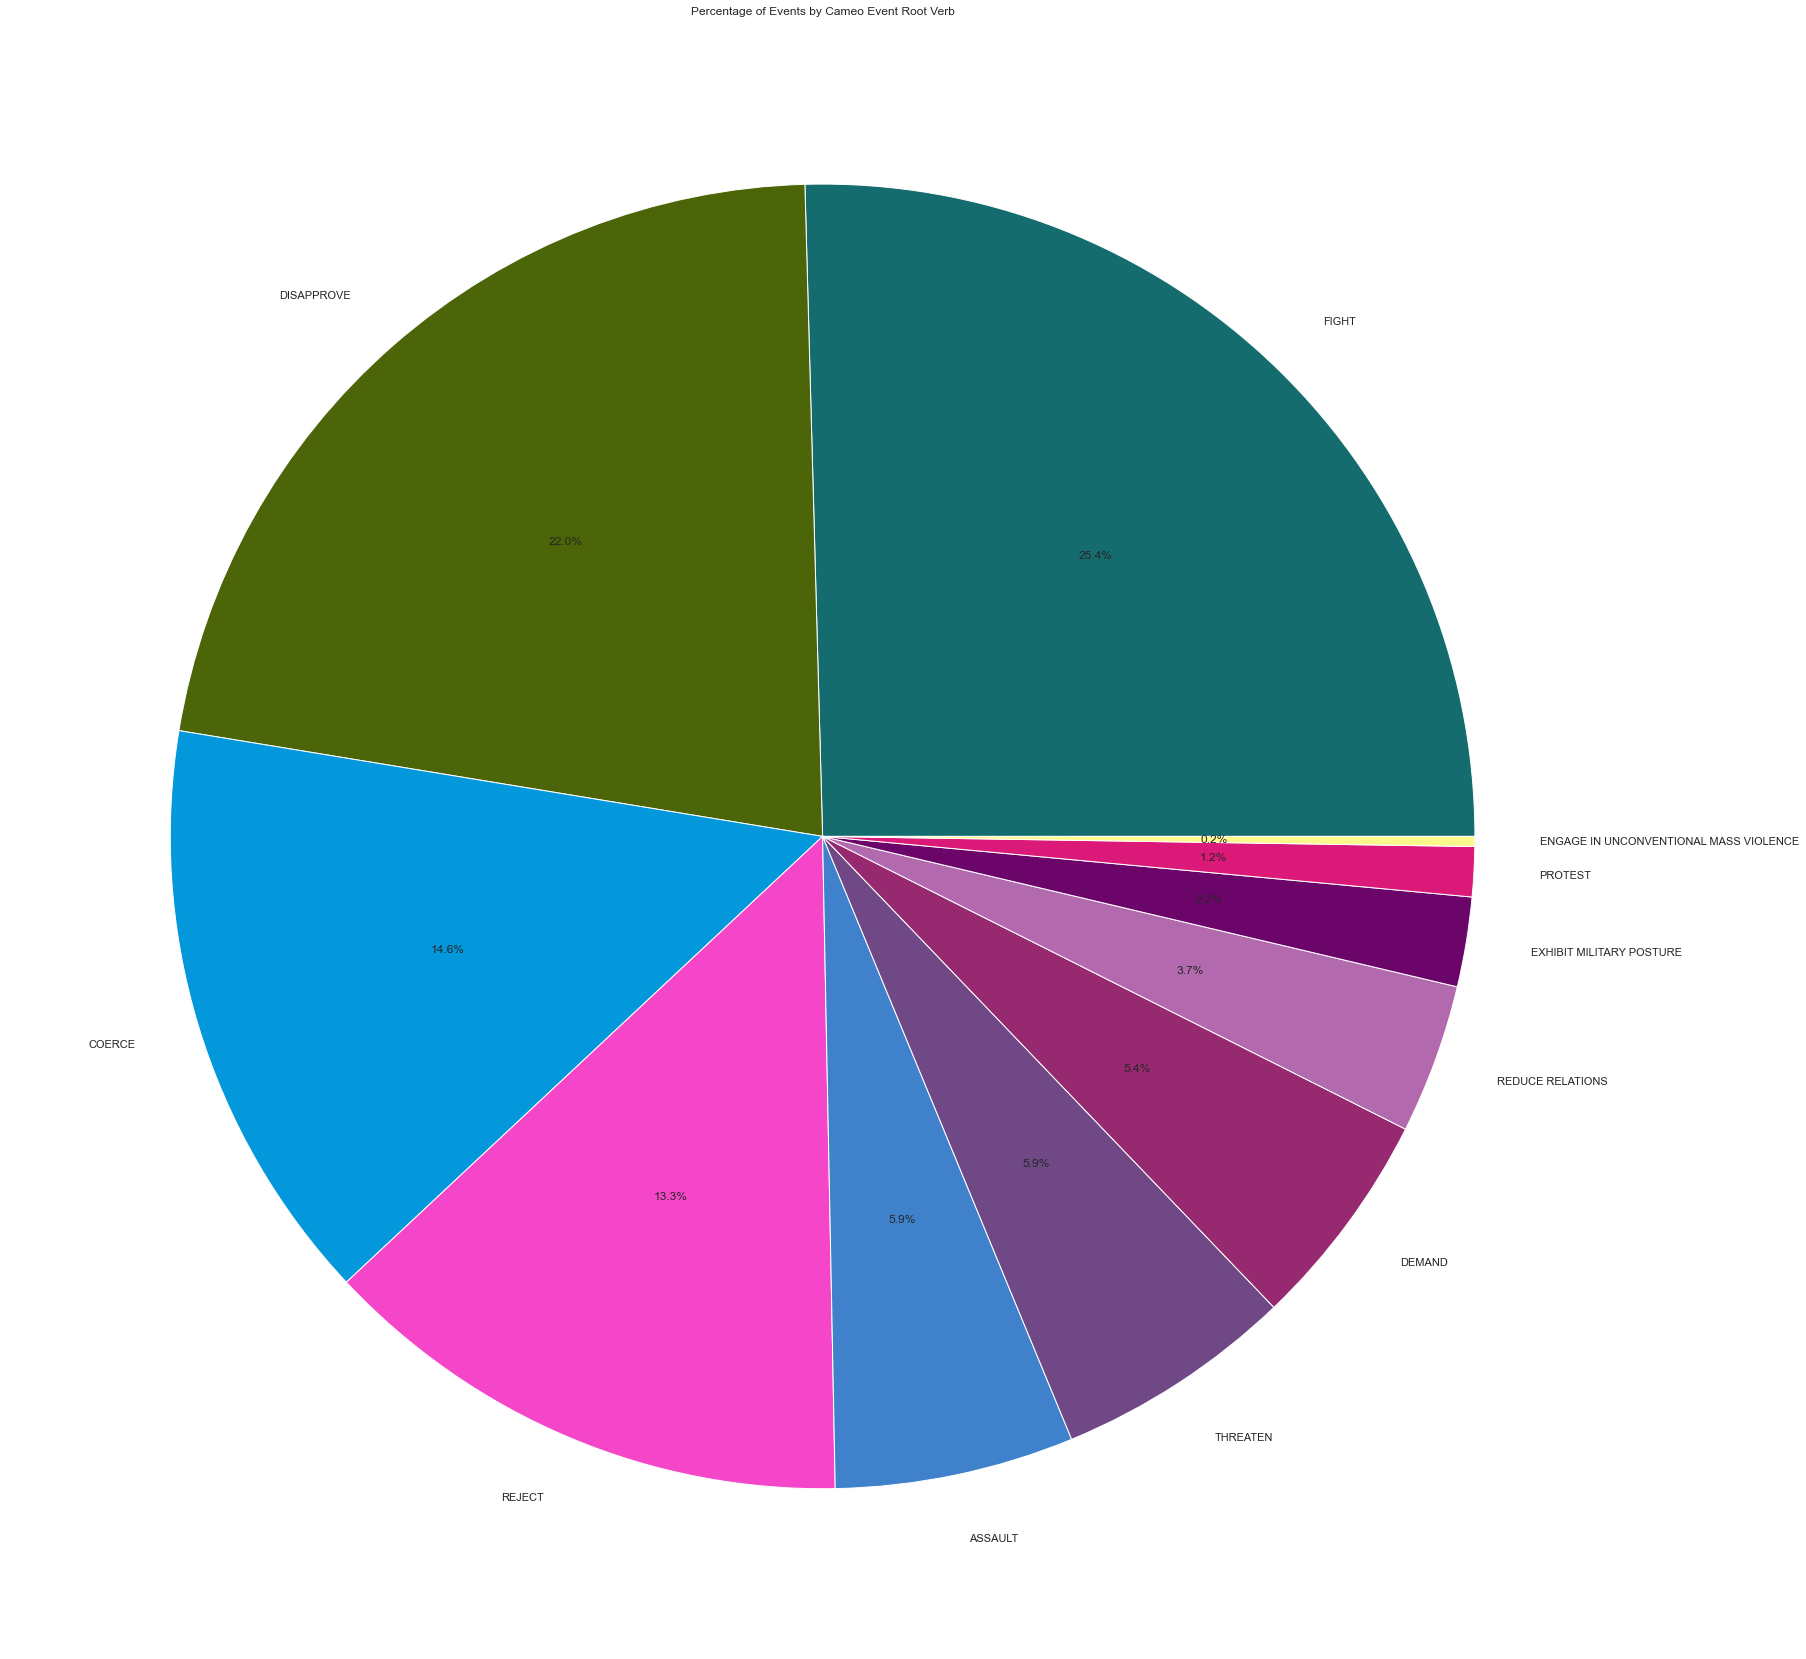

In [19]:
plot_piechart(cameoaction, 'EventRootCodeString', 'Cameo Event Root Verb', 'cameo_verb_percentages')

Observations: This exploration is briefly placed on hold until after the meeting with the Data Engineers to establish the most efficient pipeline to import GDELT's data (02 March 2021)

### Question 3: What is the Count of EventRootCodes by QuadClass? (ie. does is match the documentation?)

In [20]:
quadclass_events = conflict_df[['GLOBALEVENTID','QuadClass','QuadClassString','EventRootCodeString']].groupby(['QuadClass','QuadClassString','EventRootCodeString']).count()
print(quadclass_events.shape)
quadclass_events

(11, 1)


GLOBALEVENTID
QuadClass QuadClassString   EventRootCodeString                                  
3         Verbal Conflict   DEMAND                                             22
                            DISAPPROVE                                         89
                            PROTEST                                             5
                            REJECT                                             54
                            THREATEN                                           24
4         Material Conflict ASSAULT                                            24
                            COERCE                                             59
                            ENGAGE IN UNCONVENTIONAL MASS VIOLENCE              1
                            EXHIBIT MILITARY POSTURE                            9
                            FIGHT                                             103
                            REDUCE RELATIONS                                   15